In [ ]:
from utils import file_utils as fu
from smooth import method_factory as mf_smoothing
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame

area = 'tw_oc'
m = 'smoothing'
dim = -1# not used here
smooth_method = mf_smoothing[m]()

train, val, test = fu.load_data(area)
I,L = train.shape

%matplotlib inline

2016-08-02 20:05:11,112 INFO --> Mem and popularity learnt from training data; searching alpha on validation set
2016-08-02 20:05:11,113 INFO --> Loading all data for area tw_oc


# tw_oc results

In [ ]:
logP_p,logP_indiv,mix_alpha = smooth_method.evaluate(train, val, test, dim, area)

2016-08-02 20:05:33,123 INFO --> #####learning statistical translation model#######
2016-08-02 20:05:33,143 INFO --> computing sparse mutual information


#### Not including translation model because it is not scalable now.

# split users into 3 parts according amount of data

In [3]:
n_data = [int(train.sum(axis=1)[i][0]) for i in range(I)]
idx = sorted(range(len(n_data)), key=lambda k: n_data[k])
_s = int((len(idx) / 40) + 1)
idx_S = idx[0:33*_s]
idx_M = idx[33*_s:39*_s]
idx_L = idx[39*_s:]
train_S = train[idx_S,:]
train_M = train[idx_M,:]
train_L = train[idx_L,:]
val_S = val[idx_S,:]
val_M = val[idx_M,:]
val_L = val[idx_L,:]
test_S = test[idx_S,:]
test_M = test[idx_M,:]
test_L = test[idx_L,:]

In [4]:
x = []
col_names = ['Train', 'Val', 'Test']
row_names = ['Small','Medium','Large']
x =[[train_S.sum(),val_S.sum(),test_S.sum()],
   [train_M.sum(),val_M.sum(),test_M.sum()],
   [train_L.sum(),val_L.sum(),test_L.sum()]]

x = np.array(x)
print('Amount of data')
print(DataFrame(x, columns=col_names, index=row_names))

Amount of data
           Train      Val     Test
Small    89879.0  28317.0  24511.0
Medium   84078.0  27730.0  26962.0
Large   100830.0  33563.0  33436.0


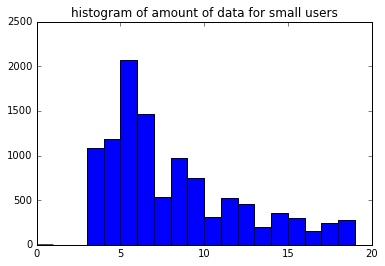

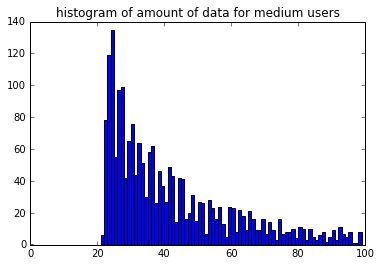

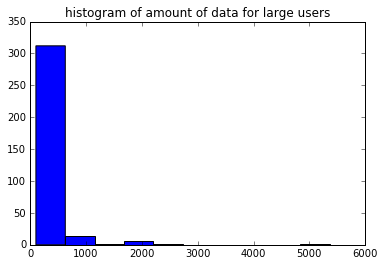

In [5]:
n_data = [int(train_S.sum(axis=1)[i][0]) for i in range(train_S.shape[0])]
plt.hist(n_data,range(0,20))
plt.title('histogram of amount of data for small users')
plt.show()
n_data = [int(train_M.sum(axis=1)[i][0]) for i in range(train_M.shape[0])]
plt.hist(n_data,range(0,100))
plt.title('histogram of amount of data for medium users')
plt.show()
n_data = [int(train_L.sum(axis=1)[i][0]) for i in range(train_L.shape[0])]
plt.hist(n_data)
plt.title('histogram of amount of data for large users')
plt.show()

## mixure weight

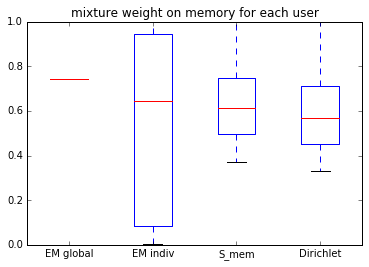

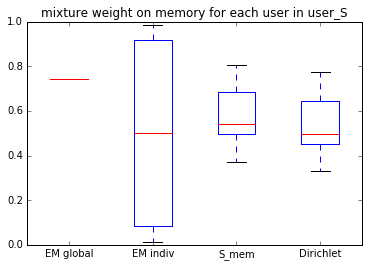

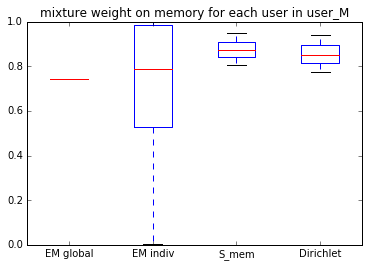

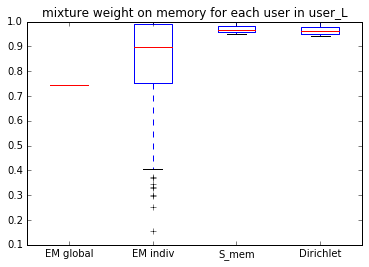

In [14]:
temp = [1,2,3,4]
labels = ['EM global','EM indiv','S_mem','Dirichlet']

data = [mix_alpha['EM global'],mix_alpha['EM indiv'],mix_alpha['S_mem'],mix_alpha['Dirichlet']]
plt.boxplot(data)
plt.title('mixture weight on memory for each user')
plt.xticks(temp , labels)
plt.show()


data = [mix_alpha['EM global'][idx_S],mix_alpha['EM indiv'][idx_S],mix_alpha['S_mem'][idx_S],mix_alpha['Dirichlet'][idx_S]]
plt.boxplot(data)
plt.title('mixture weight on memory for each user in user_S')
plt.xticks(temp , labels)
plt.show()

data = [mix_alpha['EM global'][idx_M],mix_alpha['EM indiv'][idx_M],mix_alpha['S_mem'][idx_M],mix_alpha['Dirichlet'][idx_M]]
plt.boxplot(data)
plt.title('mixture weight on memory for each user in user_M')
plt.xticks(temp , labels)
plt.show()

data = [mix_alpha['EM global'][idx_L],mix_alpha['EM indiv'][idx_L],mix_alpha['S_mem'][idx_L],mix_alpha['Dirichlet'][idx_L]]
plt.boxplot(data)
plt.title('mixture weight on memory for each user in user_L')
plt.xticks(temp , labels)
plt.show()

## log_likelihood avg. on users

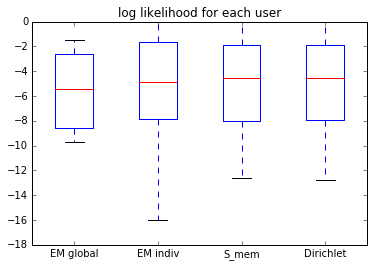

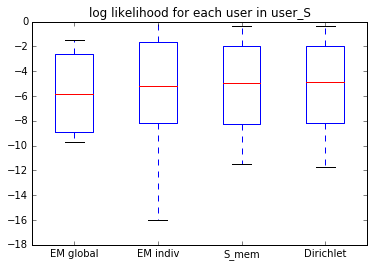

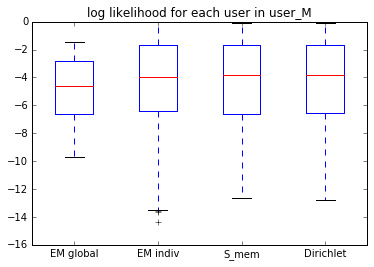

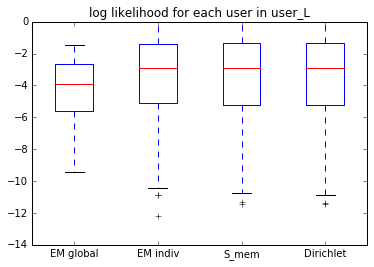

In [15]:
temp = [1,2,3,4]
labels = ['EM global','EM indiv','S_mem','Dirichlet']

data = [logP_indiv['EM global'],logP_indiv['EM indiv'],logP_indiv['S_mem'],logP_indiv['Dirichlet']]
plt.boxplot(data)
plt.title('log likelihood for each user')
plt.xticks(temp , labels)
plt.show()


data = [logP_indiv['EM global'][idx_S],logP_indiv['EM indiv'][idx_S],logP_indiv['S_mem'][idx_S],logP_indiv['Dirichlet'][idx_S]]
plt.boxplot(data)
plt.title('log likelihood for each user in user_S')
plt.xticks(temp , labels)
plt.show()

data = [logP_indiv['EM global'][idx_M],logP_indiv['EM indiv'][idx_M],logP_indiv['S_mem'][idx_M],logP_indiv['Dirichlet'][idx_M]]
plt.boxplot(data)
plt.title('log likelihood for each user in user_M')
plt.xticks(temp , labels)
plt.show()

data = [logP_indiv['EM global'][idx_L],logP_indiv['EM indiv'][idx_L],logP_indiv['S_mem'][idx_L],logP_indiv['Dirichlet'][idx_L]]
plt.boxplot(data)
plt.title('log likelihood for each user in user_L')
plt.xticks(temp , labels)
plt.show()